## MATH1042: Peluang dan Statistika
# Proyek 3B: Survei Bandara 2.0
## Tugas Pemrograman
## Kelompok 2

In [1]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat

In [2]:
data_raw = pd.read_csv("airport.csv")
data = data_raw[["Quarter", "Date recorded", "Departure time", "Courtesy of of check-in staff", "Courtesy of inspection staff", "Courtesy of security staff"]]

In [3]:
data_raw.head()

,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,...,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,3Q16,09/04/2016,11:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,4.0,0.0,4.0,5.0,4.0,4.0,0.0,0.0,0.0
1,2Q16,05/01/2016,16:45,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
2,2Q16,04/07/2016,11:10,4.0,4.0,4.0,5.0,5.0,5.0,5.0,...,0.0,5.0,5.0,5.0,5.0,5.0,NaN,0.0,5.0,0.0
3,3Q16,09/02/2016,17:16,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
4,3Q16,08/04/2016,7:49,5.0,0.0,0.0,0.0,4.0,4.0,4.0,...,2.0,4.0,4.0,2.0,5.0,4.0,4.0,0.0,4.0,0.0


In [4]:
class Courtesy:

    def __init__(self, dataset, column):
        self.data_raw = dataset[column]
        self.column = column
        self.data = self.replace_nan_with_0(self.data_raw)
        self.mean = np.mean(self.data)
        self.std = np.std(self.data)
        self.var = self.std ** 2
        self.size = len(self.data)
        self.mode_raw = stat.mode(self.data)
        self.mode_value = self.mode_raw[0]
        self.mode_freq = self.mode_raw[1]
        self.mean_sample = 0
        self.std_sample = 0
        self.samples = 0
        self.random_samples = 0
        self.z = 0


    def replace_nan_with_0(self, arr):
        to_drop = []
        for i in range(len(arr)):
            if pd.isna(arr[i]):
                to_drop.append(i)
        arr = arr.drop(labels=to_drop, axis=0)
        return sorted(arr)

    def generate_sample(self, samples, random_samples):
        mean_samples = []
        self.samples = samples
        self.random_samples = random_samples
        for i in range(samples):
            random_sum = 0
            for j in range(random_samples):
                random_sum += self.data[random.randint(1, self.size) - 1]

            avg = random_sum / random_samples
            mean_samples.append(avg)

        self.mean_sample = np.mean(mean_samples)
        self.std_sample = np.std(mean_samples)


    def histogram(self, data_to_plot, n_bins, lineheight):
        fig, ax = plt.subplots(figsize=(9, 6))
        plt.title(f"Histogram {self.column}")
        plt.xlabel(f"{self.column} category")
        plt.vlines(x=self.mean, ymin=0, ymax=lineheight, label=f"Mean: {round(self.mean, 2)}", color="red", linestyles="dashed")
        plt.ylabel("Frequency")
        plt.legend(loc="upper right")
        plt.grid()
        sns.histplot(data_to_plot, ax=ax, bins=n_bins)

    def boxplot(self):
        sns.boxplot(y=self.data_raw)

    def z_score(self, m):
        z = (self.mean - m) / (self.std / np.sqrt(self.size))
        self.z = z
        return z

    def uji_hipotesa(self, keyakinan, m):
        self.z_score(m)
        dict_keyakinan = {0.99: 2.326,
                          0.975: 1.960,
                          0.95: 1.645,
                          0.9: 1.29,
                          0.85: 1.04,
                          0.8: 0.85}

        if self.z >= dict_keyakinan[keyakinan]:
            print(f"Diterima, {self.z} >= {dict_keyakinan[keyakinan]}")
        else:
            print(f"Ditolak, {self.z} < {dict_keyakinan[keyakinan]} ")


# https://meet.google.com/jwy-ovpw-fyb

def two_population_mean(pop1, pop2, d0):
    x1 = pop1.mean
    x2 = pop2.mean
    s1 = pop1.std
    s2 = pop2.std
    n1 = pop1.size
    n2 = pop2.size
    t_prime = ((x1 - x2) - d0) / np.sqrt(((s2 ** 2) / n1) + ((s2 ** 2) / n2))
    v = ((s1 ** 2 / n1) + (s2 ** 2 / n2)) ** 2 / (
                (((s1 ** 2 / n1) ** 2) / (n1 - 1)) + (((s2 ** 2 / n2) ** 2) / (n2 - 1)))
    return t_prime, int(v)


def two_population_variance(pop1, pop2):
    # null hyp: sig1^2 = sig2^2
    # alternate hyp: sig1^2 != sig2^2
    # F = (s1^2/sig1^2)/(s2^2/sig2^2). H0, thus sig1 = sig2
    # thus, F = s1^2/s2^2
    s1 = pop1.std
    s2 = pop2.std
    n1 = pop1.size
    n2 = pop2.size
    f = s1 ** 2 / s2 ** 2
    return f, n1, n2

In [5]:
check_in = Courtesy(data, "Courtesy of of check-in staff")
inspection = Courtesy(data, "Courtesy of inspection staff")
security = Courtesy(data, "Courtesy of security staff")

In [6]:
print(check_in.mean, check_in.std)
print(inspection.mean, inspection.std)
print(security.mean, security.std)

3.778196578718469 1.7809370697054343
3.4563876651982377 1.9149902188807106
3.9619596541786746 1.4234530684717595


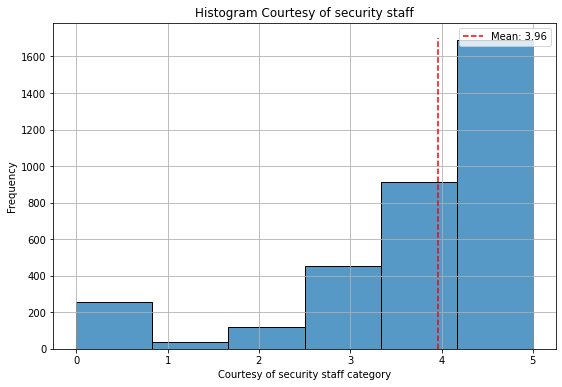

In [7]:
check_in.histogram(check_in.data, 6, 1800)
inspection.histogram(inspection.data, 6, 1500)
security.histogram(security.data, 6, 1700)

In [8]:
z_1sided_99 = 2.33
z_1sided_95 = 1.65
z_1sided_90 = 1.29
z_1sided_85 = 1.04
z_1sided_80 = 0.85

In [9]:
print("Z Score")
print(check_in.z_score(4))
print(inspection.z_score(4))
print(security.z_score(4))

Z Score
-7.3141904458379505
-16.564613253912118
-1.5742222299189832


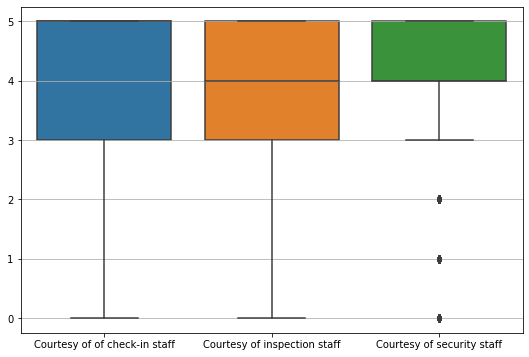

In [10]:
combi_data = data_raw[["Courtesy of of check-in staff", "Courtesy of inspection staff", "Courtesy of security staff"]]
fig, ax = plt.subplots(figsize=(9, 6))
plt.grid()
sns.boxplot(data=combi_data)

In [11]:
m = 4

print("check in")
uh_check_in = check_in.uji_hipotesa(0.99, m)
print()
print("inspection")
uh_inspection = inspection.uji_hipotesa(0.99, m)
print()
print("security")
uh_security = security.uji_hipotesa(0.99, m)

check in
Ditolak, -7.3141904458379505 < 2.326 

inspection
Ditolak, -16.564613253912118 < 2.326 

security
Ditolak, -1.5742222299189832 < 2.326 


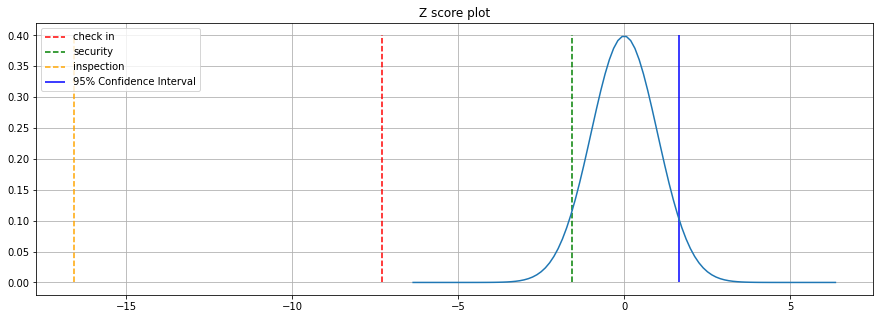

In [12]:
z_a = 1 - 1E-10
x_norm = np.linspace(stat.norm.ppf(1 - z_a), stat.norm.ppf(z_a), 100)
y_norm = stat.norm.pdf(x_norm)

z_bound = 1.645

plt.figure(figsize=(15, 5))


plt.title(label=f"Z score plot")
plt.vlines(x=check_in.z_score(4), ymin=0, ymax=0.4, color="red", linestyles="dashed", label="check in")
plt.vlines(x=security.z_score(4), ymin=0, ymax=0.4, color="green", linestyles="dashed", label="security")
plt.vlines(x=inspection.z_score(4), ymin=0, ymax=0.4, color="orange", linestyles="dashed", label="inspection")

plt.vlines(x=z_bound, ymin=0, ymax=0.4, color="blue", label="95% Confidence Interval")
plt.legend(loc="upper left")

plt.grid()
plt.plot(x_norm, y_norm)

In [13]:
check_in.generate_sample(samples=3501, random_samples=100)
inspection.generate_sample(samples=3501, random_samples=100)
security.generate_sample(samples=3501, random_samples=100)

In [14]:
checkin_inspection = two_population_mean(check_in, 
                                         inspection, 
                                         0)
checkin_security = two_population_mean(check_in, 
                                       security, 
                                       0)
security_inspection = two_population_mean(security, 
                                          inspection, 
                                          0)

confidence_bound_2 = stat.t.ppf(0.025, df=6702)
confidence_bound_1 = -1 * confidence_bound_2

print("batas")
print(confidence_bound_2, " < t < ", confidence_bound_1)
print()
print("check in - inspection")
print(checkin_inspection[0])
print()
print("check in - security")
print(checkin_security[0])
print()
print("security - inspection")
print(security_inspection[0])

batas
-1.9603180120586967  < t <  1.9603180120586967

check in - inspection
6.956080740166674

check in - security
-5.369140477496884

security - inspection
10.944688064376809


In [15]:
t_checkin_inspection = checkin_inspection[0]
v_checkin_inspection = checkin_inspection[1]

t_checkin_security = checkin_security[0]
v_checkin_security = checkin_security[1]

t_security_inspection = security_inspection[0]
v_security_inspection = security_inspection[1]

In [16]:
print(stat.t.ppf(q=0.05, df=v_checkin_inspection))
print(stat.t.ppf(q=0.05, df=v_checkin_security))
print(stat.t.ppf(q=0.05, df=v_security_inspection))

-1.6450776754608512
-1.6450852356150896
-1.6450961854762964


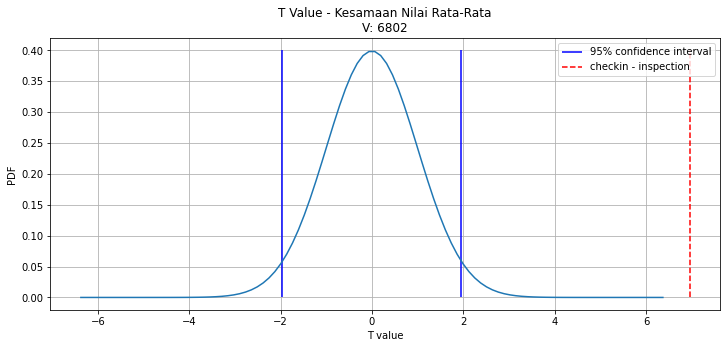

In [17]:
a = 1 - 1E-10
confidence_bound_2_c_i = stat.t.ppf(0.025, df=v_checkin_inspection)
confidence_bound_1_c_i = -1 * confidence_bound_2

x_c_i = np.linspace(stat.t.ppf(1 - a, v_checkin_inspection), stat.t.ppf(a, v_checkin_inspection), 100)
y_c_i = stat.t.pdf(x_c_i, v_checkin_inspection)

plt.figure(figsize=(12, 5))
plt.title(label=f"T Value - Kesamaan Nilai Rata-Rata\nV: {v_checkin_inspection}")
plt.ylabel("PDF")
plt.xlabel("T value")
plt.vlines(x=confidence_bound_2_c_i, ymin=0, ymax=0.4, color="blue", label="95% confidence interval")
plt.vlines(x=confidence_bound_1_c_i, ymin=0, ymax=0.4, color="blue")

plt.vlines(x=t_checkin_inspection, ymin=0, ymax=0.4, color="red", linestyles="dashed", label="checkin - inspection")

plt.legend(loc="upper right")
plt.grid()
plt.plot(x_c_i, y_c_i)

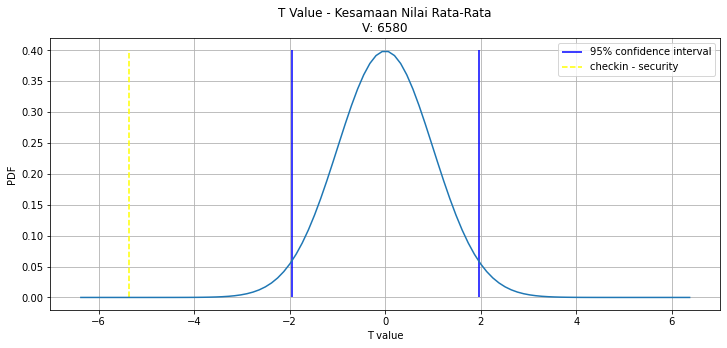

In [18]:
confidence_bound_2_c_s = stat.t.ppf(0.025, df=v_checkin_security)
confidence_bound_1_c_s = -1 * confidence_bound_2

x_c_s = np.linspace(stat.t.ppf(1 - a, v_checkin_security), stat.t.ppf(a, v_checkin_security), 100)
y_c_s = stat.t.pdf(x_c_s, v_checkin_security)

plt.figure(figsize=(12, 5))

plt.title(label=f"T Value - Kesamaan Nilai Rata-Rata\nV: {v_checkin_security}")
plt.ylabel("PDF")
plt.xlabel("T value")

plt.vlines(x=confidence_bound_2, ymin=0, ymax=0.4, color="blue", label="95% confidence interval")
plt.vlines(x=confidence_bound_1, ymin=0, ymax=0.4, color="blue")
plt.vlines(x=t_checkin_security, ymin=0, ymax=0.4, color="yellow", linestyles="dashed", label="checkin - security")

plt.legend(loc="upper right")
plt.grid()
plt.plot(x_c_s, y_c_s)

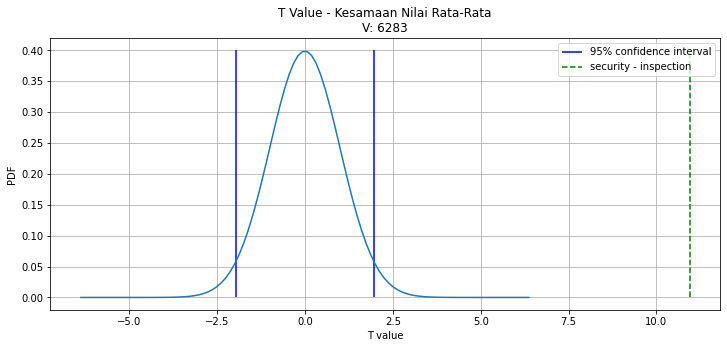

In [19]:
confidence_bound_2_s_i = stat.t.ppf(0.025, df=v_security_inspection)
confidence_bound_1_s_i = -1 * confidence_bound_2

x_s_i = np.linspace(stat.t.ppf(1 - a, v_security_inspection), stat.t.ppf(a, v_security_inspection), 100)
y_s_i = stat.t.pdf(x_s_i, v_security_inspection)

plt.figure(figsize=(12, 5))

plt.title(label=f"T Value - Kesamaan Nilai Rata-Rata\nV: {v_security_inspection}")
plt.ylabel("PDF")
plt.xlabel("T value")

plt.vlines(x=confidence_bound_2, ymin=0, ymax=0.4, color="blue", label="95% confidence interval")
plt.vlines(x=confidence_bound_1, ymin=0, ymax=0.4, color="blue")
plt.vlines(x=t_security_inspection, ymin=0, ymax=0.4, color="green", linestyles="dashed", label="security - inspection")

plt.legend(loc="upper right")
plt.grid()
plt.plot(x_s_i, y_s_i)

In [20]:
a = 0.05
conf_inf = (1 - a) * 100
f_checkin_inspection = two_population_variance(check_in, 
                                               inspection)
f_checkin_security = two_population_variance(check_in, 
                                             security)
f_security_inspection = two_population_variance(security, 
                                                inspection)
f_df = f_checkin_inspection[1] - 1
f_lower_bound = stat.f.ppf(a/2, f_checkin_inspection[1] - 1, 
                           f_checkin_inspection[2] - 1)
f_upper_bound = stat.f.ppf(1 - a/2, f_checkin_inspection[1] - 1, 
                           f_checkin_inspection[2] - 1)

print("batas")
print(f_lower_bound, "< f <", f_upper_bound)
print()
print("check in - inspection")
print(f_checkin_inspection[0])
print()
print("check in - security")
print(f_checkin_security[0])
print()
print("security - inspection")
print(f_security_inspection[0])

batas
0.9352177775807066 < f < 1.0692852802379387

check in - inspection
0.8648962762420406

check in - security
1.565347779625557

security - inspection
0.5525265934506454


Reject $H_0$ if $f_0>f_{\alpha/2,n_1-1, n_2-1}$ or $f_0<f_{1-\alpha/2,n_1-1, n_2-1}$<br>
Reject $H_0$ if $f_0>f_{0.025,3500, 3500}$ or $f_0<f_{0.975,3500, 3500}$

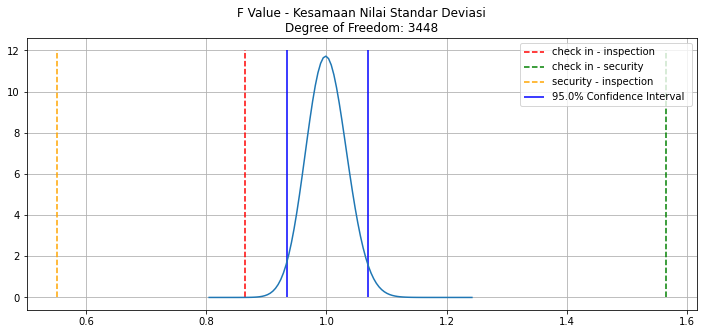

In [21]:
# f_df = 100
f_a = 1 - 1E-10
x_f = np.linspace(stat.f.ppf(1 - f_a, f_df, f_df), stat.f.ppf(f_a, f_df, f_df), 100)
y_f = stat.f.pdf(x_f, f_df, f_df)

plt.figure(figsize=(12, 5))
plt.title(label=f"F Value - Kesamaan Nilai Standar Deviasi\nDegree of Freedom: {f_df}")
plt.vlines(x=f_checkin_inspection[0], ymin=0, ymax=12, color="red", linestyles="dashed", label="check in - inspection")
plt.vlines(x=f_checkin_security[0], ymin=0, ymax=12, color="green", linestyles="dashed", label="check in - security")
plt.vlines(x=f_security_inspection[0], ymin=0, ymax=12, color="orange", linestyles="dashed", label="security - inspection")

plt.vlines(x=f_lower_bound, ymin=0, ymax=12, color="blue", label=f"{conf_inf}% Confidence Interval ")
plt.vlines(x=f_upper_bound, ymin=0, ymax=12, color="blue")

plt.legend(loc="upper right")
plt.grid()
plt.plot(x_f, y_f)